# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
from ivis import Ivis
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('Usoskin')

In [4]:
X.shape

(621, 4184)

In [5]:
y = y.reshape((y.shape[0],))

In [6]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'darkgreen',
    'skyblue', 'lime', 'royalblue' , 'cyan', 'olive',
    'tomato', 'saddlebrown', 'sienna', 'navy', 'violet',
    'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying IVIS

In [7]:
X_ivis = Ivis(verbose=0).fit_transform(X)

# Plotting the results

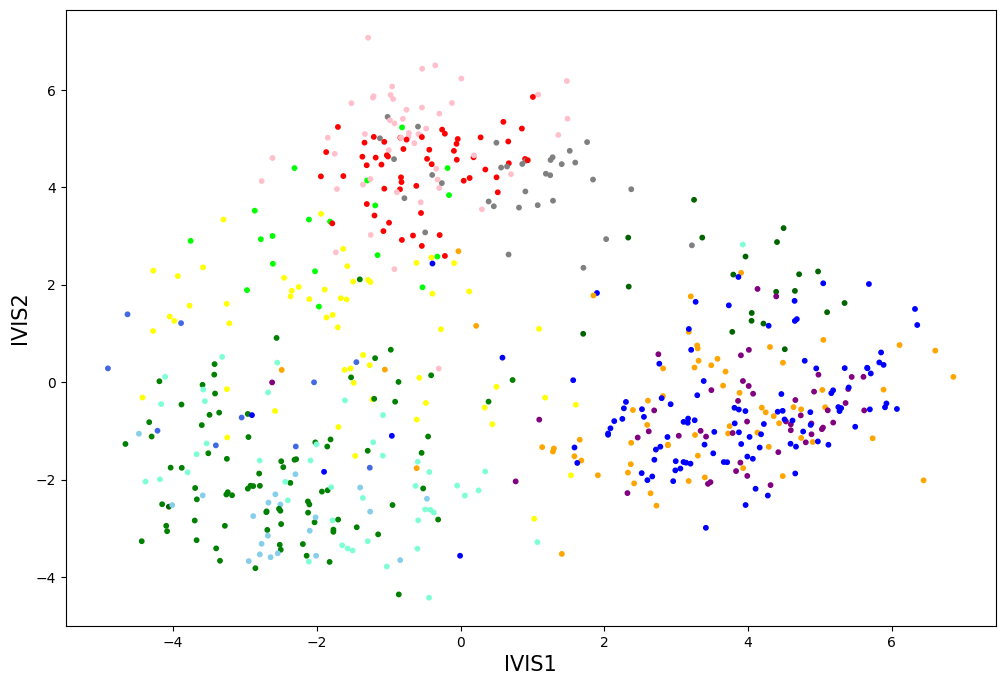

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_ivis[:,0],X_ivis[:,1],c=cs,s=10)
plt.xlabel("IVIS1", fontsize = 15)
plt.ylabel("IVIS2", fontsize = 15)
plt.savefig(dir+'Usoskin_IVIS.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score_ivis = []
res_kmeans_ivis = []
res_agglomerative_ivis = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    X_ivis = Ivis(verbose=0).fit_transform(X)
    dist_method = np.square(euclidean_distances(X_ivis, X_ivis)).flatten()
    score_ivis.append(DA.correlation(dist_orig, dist_method))
    res_kmeans_ivis.append(DA.kmeans(X_ivis, y))
    res_agglomerative_ivis.append(DA.Agglomerative(X_ivis, y))

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


In [10]:
result = pd.DataFrame(score_ivis,columns =['IVIS'])
result

,IVIS
0,0.011652
1,-0.019006
2,-0.004454
3,0.064733
4,0.023606
5,-0.012832
6,0.009562
7,-0.042946
8,0.051130
9,-0.004229


In [11]:
pd.DataFrame(res_kmeans_ivis,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.243333,0.313926,0.471146,0.365742,0.864163
1,0.245661,0.316520,0.468720,0.337656,0.904423
2,0.217086,0.289606,0.438620,0.363171,0.866385
3,0.246838,0.317191,0.483661,0.363775,0.861673
4,0.239258,0.312924,0.471899,0.387790,0.827748
5,0.253170,0.323472,0.461867,0.341079,0.941701
6,0.260959,0.330666,0.470504,0.361169,0.863930
7,0.265329,0.335863,0.488750,0.381319,0.854528
8,0.180594,0.256353,0.387128,0.344862,0.837460
9,0.247653,0.318453,0.464263,0.365784,0.845564


In [12]:
pd.DataFrame(res_agglomerative_ivis,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.262262,0.336187,0.472599,0.348075,0.898517
1,0.288556,0.362600,0.478762,0.339054,0.907088
2,0.237096,0.310320,0.443367,0.332350,0.937891
3,0.253622,0.324076,0.491952,0.311083,0.935735
4,0.256457,0.332378,0.481000,0.380938,0.850305
5,0.235643,0.308104,0.444603,0.296680,0.979837
6,0.257475,0.330187,0.466302,0.318233,0.855352
7,0.265004,0.336619,0.487970,0.353596,0.882013
8,0.204291,0.284185,0.392990,0.301369,0.875212
9,0.254563,0.328784,0.467459,0.313992,0.854924
